In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from hyper_optim import SimpleNN


In [2]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
model_path = "test_model/l03_n0032.pth"

# Load the saved model dictionary
checkpoint = torch.load(model_path, weights_only=True, map_location=device)

# Recreate model with saved hyperparameters
model = SimpleNN(num_layers=checkpoint['num_layers'], hidden_size=checkpoint['hidden_size']).to(device)

# Load weights
model.load_state_dict(checkpoint['state_dict'])

# Load the saved weights
# model.load_state_dict(torch.load("l03_n0064.pth", weights_only=True, map_location=device))

print("Model weights loaded!")


Model weights loaded!


In [4]:

# Generate synthetic data
np.random.seed(42)
x = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1, 1)
y = np.sin(x) + 0.05 * np.random.randn(1000, 1)  # Add noise

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

# Evaluate model
model.eval()
y_pred = model(x_tensor).cpu().detach().numpy()

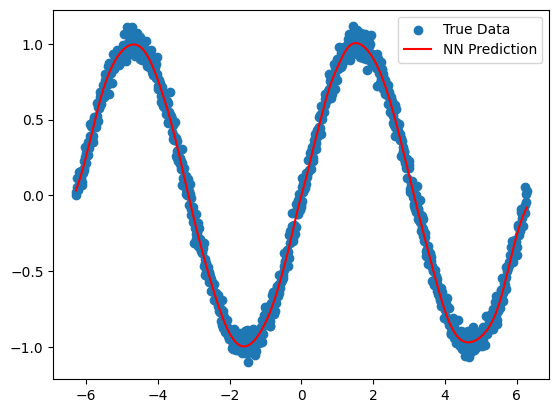

In [5]:
# Plot results
plt.scatter(x, y, label="True Data")
plt.plot(x, y_pred, color="red", label="NN Prediction")
plt.legend()
plt.show()

In [6]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import time

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Simulated dataset
X = torch.randn(100000, 3)
y = torch.randn(100000, 1)

dataset = TensorDataset(X, y)

# Without pin_memory
loader1 = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=2, pin_memory=False)
# With pin_memory
loader2 = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=2, pin_memory=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Benchmark function
def benchmark(loader, pin_memory_status):
    model = torch.nn.Linear(3, 1).to(device)
    start_time = time.time()
    
    for epoch in range(5):
        for batch_x, batch_y in loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            output = model(batch_x)
    
    elapsed_time = time.time() - start_time
    print(f"⏱ Time with pin_memory={pin_memory_status}: {elapsed_time:.2f}s")

# Run tests
benchmark(loader1, pin_memory_status=False)
benchmark(loader2, pin_memory_status=True)


Using device: cuda
⏱ Time with pin_memory=False: 6.14s
⏱ Time with pin_memory=True: 8.59s
